In [28]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.2.0


In [29]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


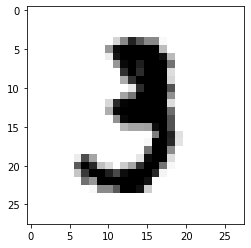

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[10], cmap = 'binary')
plt.show()

In [32]:
y_train[10]

3

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [34]:
from keras.utils import to_categorical

In [35]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [36]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [37]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [39]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [40]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


In [41]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [42]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [44]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [45]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8929
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1837 - accuracy: 0.9465
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9596
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9669
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0826 - accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9794
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9813
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.050

In [46]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9738
test set accuracy:  97.3800003528595


In [52]:
noise_factor=0.25

x_train_noise = x_train_norm + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train_norm.shape)
x_test_noise = x_test_norm + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test_norm.shape)
x_train_noise = np.clip(x_train_noise,0.,1.)
x_test_noise = np.clip(x_test_noise,0.,1.)
#print(x_train.shape)

In [53]:
loss, accuracy_new = model.evaluate(x_test_noise, y_test_encoded)

print('test set accuracy(with the noise): ', accuracy_new * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.9600
test set accuracy(with the noise):  95.99999785423279


In [67]:
model_modern = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(7840, activation = 'relu'),
    Dense(1280, activation='relu'),
    Dense(7840, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model_modern.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_modern.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_37 (Dense)             (None, 7840)              1011360   
_________________________________________________________________
dense_38 (Dense)             (None, 1280)              10036480  
_________________________________________________________________
dense_39 (Dense)             (None, 7840)              10043040  
_________________________________________________________________
dense_40 (Dense)             (None, 128)               1003648   
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
Total params: 22,196,298
Trainable params: 22,196,298
Non-trainable params: 0
__________________________________________

In [68]:
w = model_modern.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 3
)

Epoch 1/3
1875/1875 [==============================] - 308s 164ms/step - loss: 0.4593 - accuracy: 0.8697
Epoch 2/3
1875/1875 [==============================] - 311s 166ms/step - loss: 0.1654 - accuracy: 0.9501
Epoch 3/3
1875/1875 [==============================] - 308s 164ms/step - loss: 0.1190 - accuracy: 0.9642


In [69]:
loss, accuracy_new = model_modern.evaluate(x_test_noise, y_test_encoded)

print('test set accuracy(with the noise): ', accuracy_new * 100)

313/313 [==============================] - 18s 56ms/step - loss: 0.6741 - accuracy: 0.9281
test set accuracy(with the noise):  92.80999898910522
